# NGS Data Analysis and Visualization 
*Performing basic SAM file processing*

Here I utilize the samtools package from bioconda and the IGV tools to read the FOXA2 gene.

After creating the enviornemnt with:

`conda create -n NGSAnalysis`

`conda install bioconda::igv`

`conda install bioconda::samtools`

I `cd` to my data folder, create a new bash terminal with the activated environment, and run:

`samtools view HG00096.chrom20.ILLUMINA.bwa.GBR.low_coverage.20120522.bam | awk {'if($4<22568101 && $4>22559642)print $0'} > FOXA2_reads.sam`

Running the code reads the chromosome 20 file and extracts the FOXA2 reads into a seperate file called [FOXA2_reads.sam](data/processed/FOXA2_reads.sam), which found **304 reads**.

## Counting mate pairs

Running:

`sort -u -k1,1 FOXA2_reads.sam | wc` 

in the terminal gives the following numbers: **155 3328 69002**

## Plotting the distribution

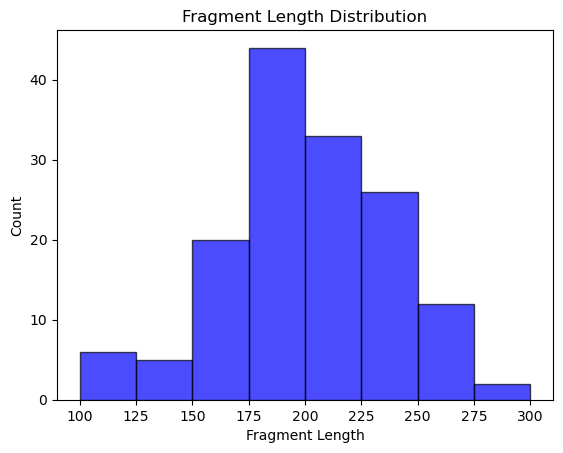

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/processed/fragment_lengths.txt')

plt.hist(df, bins=8, color='blue', edgecolor='black')
plt.title('Fragment Length Distribution')
plt.xlabel('Fragment Length')
plt.ylabel('Count')

plt.show()


Using